In [1]:
from Project4.verification_net import VerificationNet
from Project4.stacked_mnist import StackedMNISTData, DataMode
from var_ae_routine import VAE_Routine
import torch

In [4]:
torch.manual_seed(1)
""" ANOMALY VAE ROUTINE"""
batch_size = 16

data_object = StackedMNISTData(mode=DataMode.MONO_FLOAT_MISSING, default_batch_size=batch_size)
net = VerificationNet(force_learn=False)
net.train(
    generator=data_object,
    epochs=5)  # gen=data_object, makes sure we test on the same type of data as the model was trained on
verification_tolerance = 0.8 if data_object.channels == 1 else 0.5

learning_rate = 1.0e-2
loss_function = 'elbo'
optimizer = 'adam'
epochs = 20

latent_vector_size = 64
num_samples = 2000

anom_name = '3_conv_layers_lvs:_64_filters:32_lldim:8,4,4_epochs:20'
anom_vae_save_path = f'checkpoints/anom_VAE/{anom_name}'
anom_vae = VAE_Routine(
    data_object,
    learning_rate,
    loss_function,
    optimizer,
    epochs,

    latent_vector_size,
    batch_size,
    num_samples,
    anom_vae_save_path

)


VAE(
  (encoder): Encoder(
    (body): Sequential(
      (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(3, 3), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): Conv2d(32, 16, kernel_size=(3, 3), stride=(3, 3), padding=(1, 1))
      (3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (4): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): ReLU()
      (6): Flatten(start_dim=1, end_dim=-1)
    )
    (mean_layer): Linear(in_features=128, out_features=64, bias=True)
    (log_std_layer): Linear(in_features=128, out_features=64, bias=True)
  )
  (decoder): Decoder(
    (model): Sequential(
      (0): Linear(in_features=64, out_features=128, bias=True)
      (1): Unflatten(dim=1, unflattened_size=(8, 4, 4))
      (2): ConvTranspose2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): LeakyReLU(negative_slope=0.01)
      (4): BatchNorm2d(16, eps


VAE TRAINING

Epoch: 0, Iteration: 1692, Validation loss: 1198.9066, Validation KL_div 9.9067, Validation reconstruction loss -1189.0005
Epoch: 0, Iteration: 3384, Validation loss: 1184.1577, Validation KL_div 10.2628, Validation reconstruction loss -1173.8951
Epoch: 1, Iteration: 5076, Validation loss: 1167.0612, Validation KL_div 11.0494, Validation reconstruction loss -1156.0096
Epoch: 1, Iteration: 6768, Validation loss: 1149.2048, Validation KL_div 12.886, Validation reconstruction loss -1136.3179
Epoch: 2, Iteration: 8460, Validation loss: 1130.2255, Validation KL_div 12.7726, Validation reconstruction loss -1117.4531
Epoch: 2, Iteration: 10152, Validation loss: 1110.7928, Validation KL_div 13.3237, Validation reconstruction loss -1097.47
Epoch: 3, Iteration: 11844, Validation loss: 1094.6547, Validation KL_div 13.6386, Validation reconstruction loss -1081.0156
Epoch: 3, Iteration: 13536, Validation loss: 1080.2399, Validation KL_div 14.6014, Validation reconstruction loss -1065

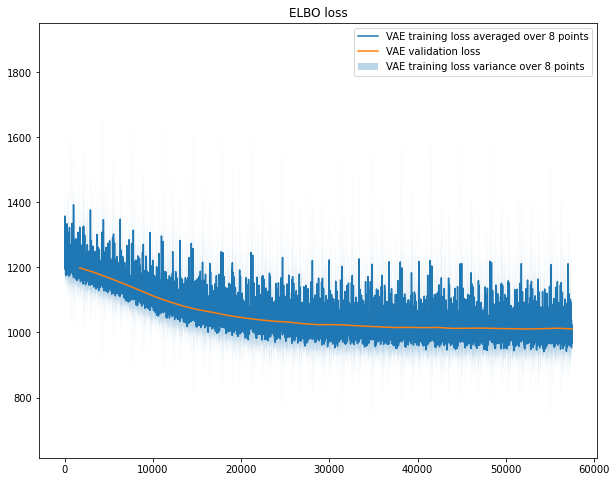

In [5]:
"""OPTIONAL TRAINING"""
anom_vae.train_vae()


Loaded model from checkpoints/anom_VAE/3_conv_layers_lvs:_64_filters:32_lldim:8,4,4_epochs:20
Anomaly loss values: [4.3077493, 4.2253013, 4.178747, 4.066604, 3.9596508, 3.8813288, 3.7356567, 3.6483493, 3.6056159, 3.5748723, 3.5221741, 3.4824111, 3.4664779, 3.4430718, 3.4329722, 3.3221831]


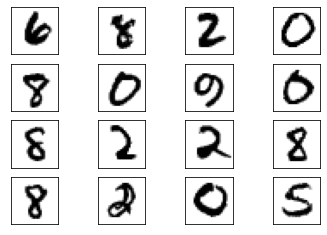

In [6]:
"""TESTING ON SPECIFIED MODEL"""
model_name = '3_conv_layers_lvs:_64_filters:32_lldim:8,4,4_epochs:20'
test_model_path = f'checkpoints/anom_VAE/{model_name}'

number_anom_images_to_show = 16
anom_vae.anomaly_detection(number_anom_images_to_show, load_model_path=test_model_path)